In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [6]:
df = pd.read_csv("employee_attrition_ - employee_attrition_impure.csv")

In [24]:
print("Shape:", df.shape)
print("\nDtypes:\n", df.dtypes)
print("\nHead:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())
print("\nDescribe:\n", df.describe())

Shape: (123, 6)

Dtypes:
 MonthlyIncome      float64
Age                float64
JobSatisfaction    float64
YearsAtCompany     float64
OverTime            object
Attrition          float64
dtype: object

Head:
    MonthlyIncome   Age  JobSatisfaction  YearsAtCompany OverTime  Attrition
0        13191.0  41.0              4.0             1.0      Yes   1.000000
1        15859.0  44.0              4.0            17.0      Yes   0.000000
4         3885.0  27.0              4.0             0.0      Yes   1.000000
5         6434.0  29.0              4.0            10.0       No   3.041494
7        14091.0  27.0              1.0            14.0      Yes   3.041494

Missing values:
 MonthlyIncome      0
Age                0
JobSatisfaction    0
YearsAtCompany     0
OverTime           0
Attrition          0
dtype: int64

Describe:
        MonthlyIncome         Age  JobSatisfaction  YearsAtCompany   Attrition
count     123.000000  123.000000       123.000000      123.000000  123.000000
mean    1

In [8]:
df = df.dropna()

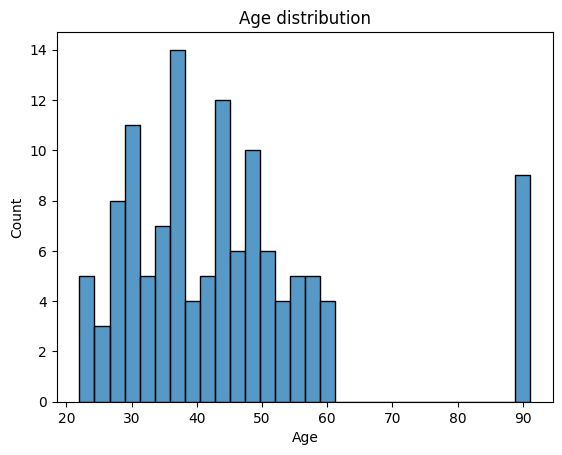

In [19]:
sns.histplot(df['Age'], bins=30)
plt.title("Age distribution")
plt.show()

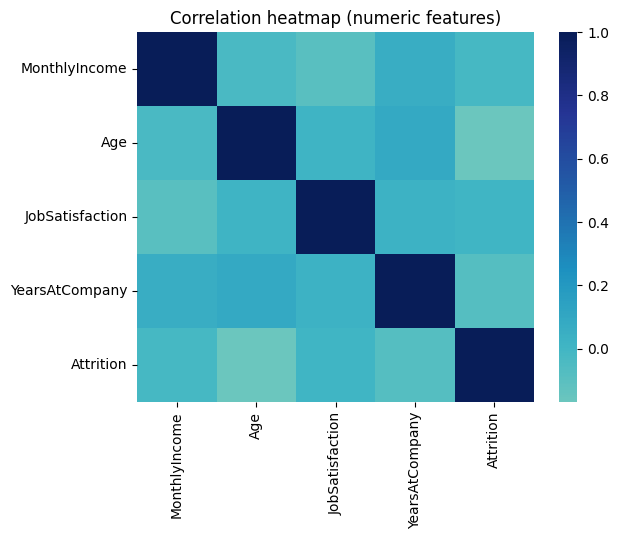

In [32]:
corr = df.select_dtypes(include="number").corr()
sns.heatmap(corr, cmap="YlGnBu", center=0)
plt.title("Correlation heatmap (numeric features)")
plt.show()

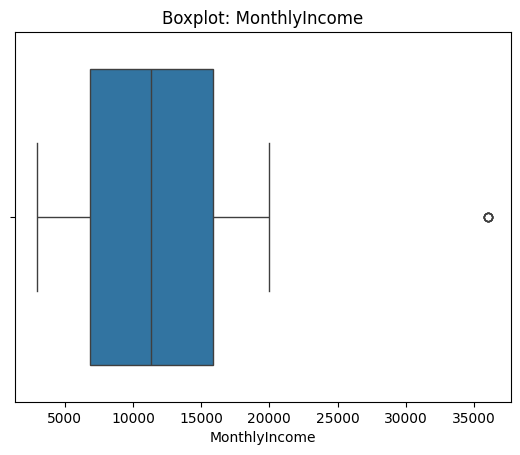

In [44]:
Q1  = df["MonthlyIncome"].quantile(0.25)
Q3  = df["MonthlyIncome"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_iqr = df[(df["MonthlyIncome"] >= lower) & (df["MonthlyIncome"] <= upper)]

sns.boxplot(x=df["MonthlyIncome"])
plt.title(f"Boxplot: {"MonthlyIncome"}")
plt.show()

In [59]:
le = LabelEncoder()
df['OverTime'] = le.fit_transform(df['OverTime'])
df['Attrition'] = le.fit_transform(df['Attrition'])

X = df[['MonthlyIncome', 'Age', 'JobSatisfaction', 'YearsAtCompany', 'OverTime']]
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test) 
x`
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))# Evaluate model

print("\nClassification Report:")
print(classification_report(y_test, log_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, log_pred))

Logistic Regression Accuracy: 0.48

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.36      0.38        11
           1       0.53      0.62      0.57        13
           2       0.00      0.00      0.00         1

    accuracy                           0.48        25
   macro avg       0.31      0.33      0.32        25
weighted avg       0.45      0.48      0.46        25


Confusion Matrix:
[[4 7 0]
 [5 8 0]
 [1 0 0]]


C:\Users\Gurmaanpree Singh\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Gurmaanpree Singh\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\U